# Setup

In this tutorial we use the defaul version of the CTGAN:
https://github.com/sdv-dev/CTGAN

We also need to install table evaluator to evaluate the quality of the generated synthetic data.

In [ ]:
!pip install ctgan


In [ ]:
!pip install table_evaluator

Now we download a dataset that includes both continuous and discrete values. I chose a random dataset from Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [ ]:
import pandas as pd
data = pd.read_excel('/content/combined_data_1.xlsx')

In [ ]:
data

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,status
0,-3044,8120,19064,-976,-677,2920,low
1,-2492,4576,17728,-928,-1850,37,low
2,-3184,4440,16392,-960,1046,1301,low
3,-3276,5332,16664,-960,1745,4382,low
4,-5008,6276,17764,-928,2511,3163,low
...,...,...,...,...,...,...,...
3188,-476,2996,14228,-1168,-3643,-3884,high
3189,1848,9188,25840,-1152,-1044,-1827,high
3190,4212,11652,20368,-1152,4095,4670,high
3191,-2924,1132,14476,-1152,-1704,2004,high


Next, we define a list with column names for categorical variables. This list will be passed to the model so that the model can decide how to process these fields.

In [ ]:
categorical_features = ['AccX','AccY','AccZ','GyroX','GyroY','GyroZ','status']

#Model training

Next, we simply define an instance of CTGANSynthesizer and call the fit method with the dataframe and the list of categorical variables.

We train the model for 300 epochs only as the discriminator and generator loss becomes quite low after these many epochs.

In [ ]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(data, categorical_features, epochs = 200)

Gen. (0.60) | Discrim. (-0.01): 100%|██████████| 200/200 [11:48<00:00,  3.54s/it]


#Synthetic data generation

In [ ]:
samples = ctgan.sample(50000)
import pandas as pd
samples.to_excel('generated_samples.xlsx', index=False)

In [ ]:
samples

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,status
0,-2784,7968,16656,-1008,330,-570,high
1,-752,7132,13968,-960,2190,124,low
2,1328,8716,15740,-1056,-2455,-2136,high
3,-3412,-796,6260,-1216,10974,-4703,high
4,-4092,-404,17900,-1216,-2942,3292,high
...,...,...,...,...,...,...,...
9995,8256,6336,15700,-976,177,-8439,low
9996,-3456,-5692,-14420,-1024,3020,4,mid
9997,-980,-952,17636,-1008,-205,-5303,high
9998,-108,4864,18096,-1024,-5386,-60,high


<ipython-input-21-683ab985d527>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(samples, x='AccY', y='status', inner='box', palette='Dark2')


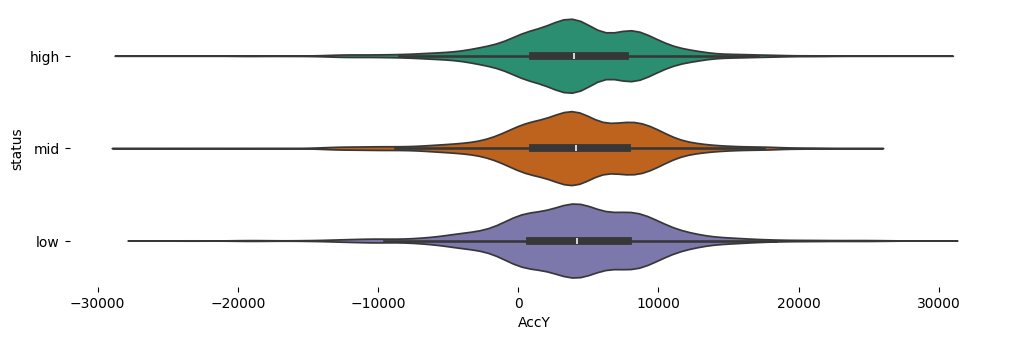

In [ ]:
# @title status vs AccY

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(samples['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(samples, x='AccY', y='status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-20-075db6ea57a0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(samples, x='AccX', y='status', inner='box', palette='Dark2')


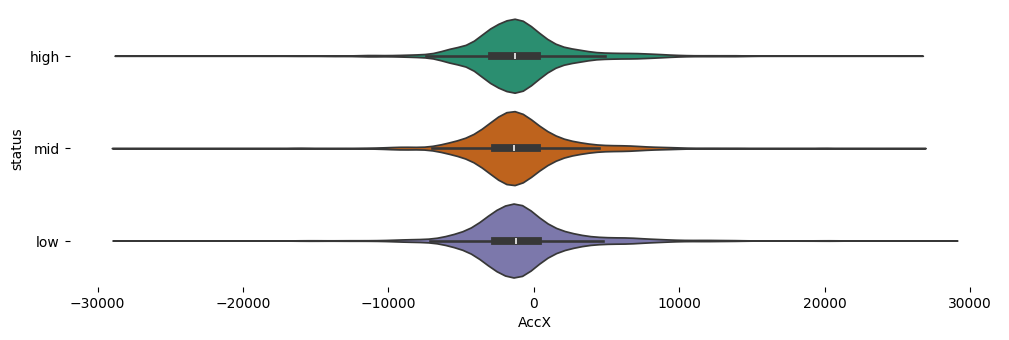

In [ ]:
# @title status vs AccX

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(samples['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(samples, x='AccX', y='status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-19-abce6342d6da>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(samples, x='GyroX', y='status', inner='box', palette='Dark2')


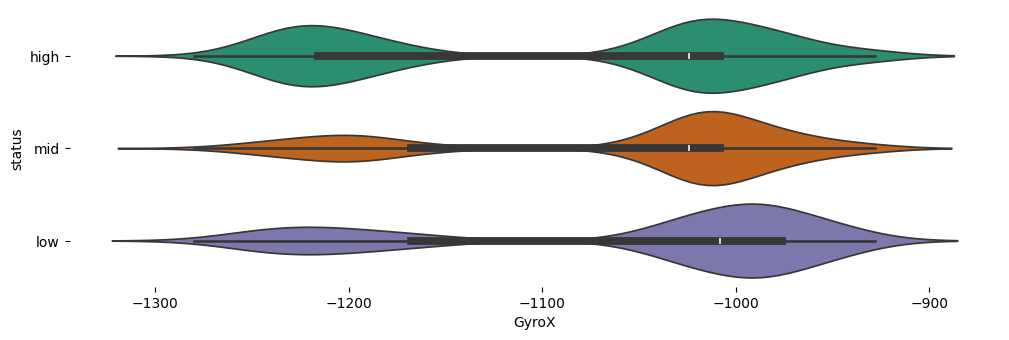

In [ ]:
# @title status vs GyroX

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(samples['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(samples, x='GyroX', y='status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#Evaluation

In [ ]:
from table_evaluator import TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)


(3193, 7) (10000, 7)
